<h1><center> <font color='blue'> High school SAT scores - groups that perform best </font> </center></h1>  

***by Susan Fisher***

This project explores correlations between SAT scores from New York City high schools and various demographics and survey topics.  Also, relationships between SAT scores and race and gender will be investigated.  

SAT or Scholastic Aptitude Test are exams that U.S. high school students take and many colleges use as a basis for college entrance.  The SAT test has three sections, each worth 800 points, and the total score is 2,400 points.  

New York City high schools are divided into five boroughs or regions, and multiple school districts.  Each school has a unique DBN number or a district borough number.  DBN consists of a City School District, CSD, and the School Code.   

The data is for the 2011-2012 school year.  Multiple files will be utilized so all the demographics will be captured.  Each file will be read in as a pandas dataframe, cleaned and combined into one dataframe by DBN number.  

All the data for this project can be downloaded from: https://data.cityofnewyork.us/browse?category=Education

The 8 files that will be read in are located at:
>1) SAT scores by school: https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4  
>2) School attendance: https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt  
>3) Class size:  https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3  
>4) AP test results: https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e  
>5) Graduation outcomes: https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a  
>6) Demographics: https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j  
>7) School survey data: https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8  
>8) District 75 school survey data:  https://data.cityofnewyork.us/Education/2012-NYC-District-75-Schools-Survey/v55h-aeac/row-jasq_t63g_heic

## <font color='blue'> READ IN DATA FILES </font>

In [1]:
# Import Python libraries.

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

Read in 6 csv files as a dictionary of pandas dataframes.  The keys are dataframe names, and the values are the dataframe.

The 6 csv files will be read as the following dataframes:
>1) sat_results: SAT scores for each high school in New York City  
>2) hs_directory: attendance information for each school in New York City  
>3) class_size: Information on class class for each scool  
>4) ap_2010: Advanced Placement (AP) exam results for each high school  
>5) graduation: Students who graduated  
>6) demographics: Demographic information for each school

In [2]:
data_files = [
    "sat_results.csv",
    "hs_directory.csv",
    "class_size.csv",    
    "ap_2010.csv",
    "graduation.csv",
    "demographics.csv",        
]

# Create dictionary, data, of dataframes.
data = {}

for x in data_files:   
    data_files_path = 'C:/Users/Name/Documents/PythonScripts/DataSets/{0}'.format(x)
    keys = (x.split('.csv')[0])
    data[keys] = pd.read_csv(data_files_path)

In [12]:
data['hs_directory'].shape

(435, 64)

Read in the two survey data text files as dataframes.  The surveys are from parents, teachers, and students at each school on topics of school safety and respect, communication, engagement, and academic expectations.  One survey file contains survey data from all districts except district 75.  The second survey file contains survey data for district 75, which are 57 schools that are designed for students with disabilities.

The two survey dataframes will be combined into one, and only relevant columns will be retained.  Survey dictionary table can be downloaded from the same location as the survey data.  

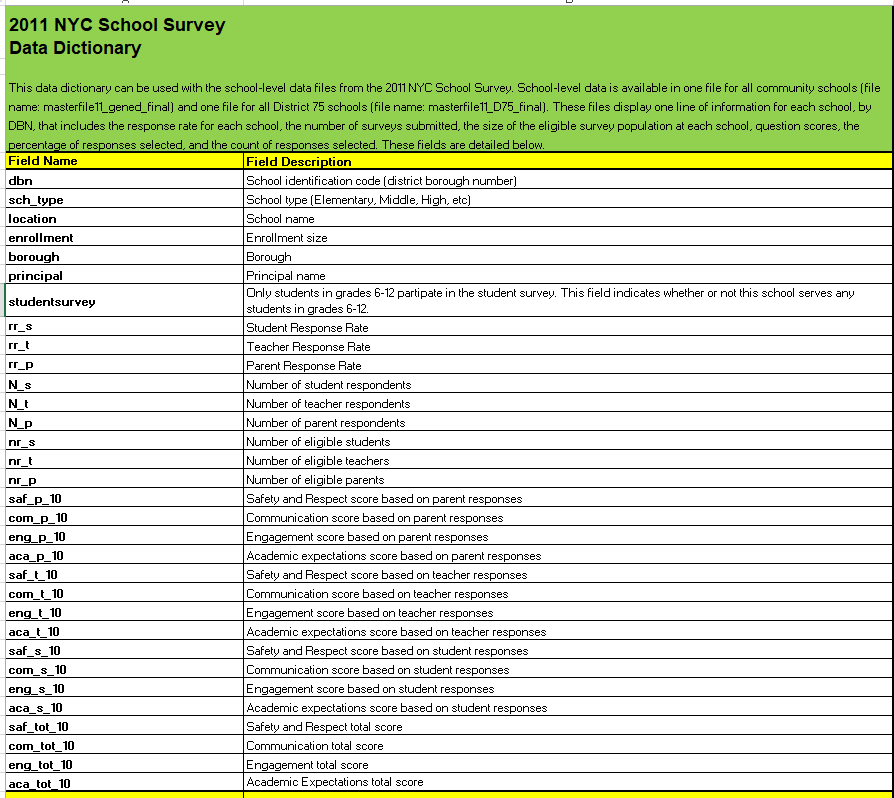

In [3]:
# Snipet of survey data dictionary.

from IPython.display import Image

# Load image, "image_name," from local drive
Image(filename="2.6.1_SurveyDictionary.png", height=1000, width=600)

In [4]:
# Read in text survey data from all schools, except district 75.
all_survey = pd.read_csv("C:/Users/Name/Documents/PythonScripts/DataSets/survey_all.txt", delimiter="\t", encoding='windows-1252')

# Read in survey data from New York City District 75.
d75_survey = pd.read_csv("C:/Users/Name/Documents/PythonScripts/DataSets/survey_d75.txt", delimiter="\t", encoding='windows-1252')

In [ ]:
a

In [5]:
# Combine both survey dataframes into one.
survey = pd.concat([all_survey, d75_survey], axis=0)

In [6]:
# Change column header name.
survey["DBN"] = survey["dbn"]

In [7]:
# Reduce the survey dataframe to only relevant columns.
survey_cols = [
    "DBN", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11",
    "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", 
    "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11",
    ]
survey = survey.loc[:, survey_cols]

In [8]:
# Add the survey dataframe to the dictionary, data.
data["survey"] = survey

## <font color='blue'> DATA EXPLORATION </font>

In [9]:
# View first few rows of sat_results.
data['sat_results'].head(2)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366


SAT results are separated into the three categories.  The total SAT scores will be used in the analysis.

In [10]:
# View first few rows of dataframe, hs_directory.
data['hs_directory'].head(2)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...


In [11]:
# View first few rows of dataframe, class_size.
data['class_size'].head(2)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN


Class_size dataframe DBN number can be taken from several columns, CSD and SCHOOL CODE (which contains the Borough letter).

In [12]:
# View first few rows of dataframe, ap_2010.
data['ap_2010'].head(2)

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,NaN


In [13]:
# View first few rows of dataframe, graduation.
data['graduation'].head(2)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5


In [14]:
# View first few rows of dataframe, demographics.
data['demographics'].head(2)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4


In [15]:
# View first few rows of survey dataframe, survey.
data['survey'].head(2)

,DBN,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4


## <font color='blue'> DATA CLEANING </font>

The dataframes will be cleaned before data analysis:
1. Sat_results dataframe: create a total SAT score column.  
2. Hs_directory dataframe: make dbn column name uppercase to match the other dataframes  
3. Class_size dataframe: create a DBN column. 
4. Ap_2010 dataframe: convert columns to numeric type.
5. Survey dataframe: rename column headers to be more descriptive.  
6. Condense dataframes: by retaining only unique DBN numbers, and reduce dataframe to just relevant columns.  
7. Combine all dataframes into one:  sat_results, hs_directory, class_size, ap_2010, graduation, demographics, survey dataframes.

### DATA CLEANING:  (1) sat_results dataframe

The total SAT score will be used in the analysis, so the SAT score for each section, (math, reading, and writing) will be sumed in a separate column in the sat_results dataframe.  To add values in multiple columns, the columns first need to be numeric.

In [16]:
# Sat_results dataframe: view type of each column.
data['sat_results'].dtypes

DBN                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object

In [17]:
# Sat_results dataframe: convert SAT columns to numeric.  

cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
    # errors="coerce": strings that pandas can't convert to numeric will be set as NaN
data['sat_results'][cols] = data['sat_results'][cols].apply(pd.to_numeric, errors='coerce')

In [18]:
# Sat_results dataframe: create total SAT scores column by adding SAT values in the 3 columns.  

# Create sat_score column at index 1.
value2 = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]
data['sat_results'].insert(1, 'sat_score', value2)

In [19]:
# Verify new column, sat_score, with total SAT scores.
data['sat_results'].head(2)

,DBN,sat_score,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,1122.0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0
1,01M448,1172.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0


In [20]:
# Sat_results dataframe: view type of new column, sat_score.
data['sat_results']['sat_score'].dtype

dtype('float64')

### DATA CLEANING:  (2) hs_directory dataframe

Eventually all the dataframes will be combined based on the DBN number, so the DBN numbers in the dataframes must be in the same format.

The hs_directory dataframe, dbn column will be renamed to uppercase.

In [21]:
# Hs_directory dataframe: rename dbn column in hs_directory to uppercase.
data["hs_directory"].rename({'dbn':'DBN'}, axis=1, inplace=True)

In [22]:
# Verify DBN column header name change.
data['hs_directory'].iloc[:1, :1]

,DBN
0,27Q260


### DATA CLEANING:  (3) class_size dataframe

The DBN consists of a one or two digit city school district number, CSD, and the school code.  When the CSD number is only 1 digit, it needs to be padded by a preceeding 0.

A DBN column will be created in the class_size dataframe by combining a padded CSD number with the school code.  

In [23]:
# Class_size dataframe: create a DBN column with padded CSD number + school code.

# View type of class_size column before padding.
data['class_size']['CSD'].dtype

dtype('int64')

In [24]:
# Function, pad_csd, pads single digit CSD numbers with a preceeding 0.
def pad_csd(num):
    '''Convert CSD number from integer to a string'''
    string = str(num)
    if len(string) > 1:
        return string
    else:
        return "0" + string

# Apply function, pad_csd, to every row in the CSD column of class_size dataframe.
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)

In [25]:
# Create a DBN column with padded CSD number + school code.

# Create DBN column at index 0.
value = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
data["class_size"].insert(0, "DBN", value)

# View first few rows of the class_size dataframe, DBN column.
data['class_size'].head(3)

,DBN,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd
0,01M015,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN,01
1,01M015,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN,01
2,01M015,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01


### DATA CLEANING: (4) ap_2010 dataframe

In [26]:
data["ap_2010"].dtypes

DBN                                     object
SchoolName                              object
AP Test Takers                          object
Total Exams Taken                       object
Number of Exams with scores 3 4 or 5    object
dtype: object

Ap_2010 dataframe, has 3 columns that need to be numeric type, and will be converted from object to numeric.  

In [27]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    # errors="coerce": strings that pandas can't convert to numeric will be set as NaN
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

In [28]:
# Confirm type change.
data["ap_2010"].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

### DATA CLEANING:  (5) survey dataframe

In [29]:
# Create a list of new column names, which will be referred to in the analysis.

survey_new_cols = [
    'DBN', 'p_safety', 'p_comm', 'p_engagement', 'p_expectations',
    't_safety', 't_comm', 't_engagement', 't_expectations',
    's_safety', 's_comm', 's_engagement', 's_expectations', 
    'safety_total', 'comm_total', 'engage_total', 'expect_total'
]

In [30]:
# Rename column header names so they are more descriptive.
# Create dictionary of old name to new name:

survey_cols_dict = {
    "saf_p_11":'p_safety', "com_p_11":'p_comm', "eng_p_11":'p_engagement',
    "aca_p_11":'p_expectations',
    "saf_t_11":'t_safety', "com_t_11":'t_comm', "eng_t_11":'t_engagement',
    "aca_t_11":'t_expectations',
    "saf_s_11":'s_safety', "com_s_11":'s_comm', "eng_s_11":'s_engagement',
    "aca_s_11":'s_expectations', 
    "saf_tot_11":'safety_total', "com_tot_11":'comm_total',
    "eng_tot_11":'engage_total', "aca_tot_11":'expect_total'
    }

In [31]:
data['survey'].rename(survey_cols_dict, axis=1, inplace=True)

In [32]:
data['survey'].columns

Index(['DBN', 'p_safety', 'p_comm', 'p_engagement', 'p_expectations',
       't_safety', 't_comm', 't_engagement', 't_expectations', 's_safety',
       's_comm', 's_engagement', 's_expectations', 'safety_total',
       'comm_total', 'engage_total', 'expect_total'],
      dtype='object')

## DATA CLEANING:  (6) condense dataframes

Before the dataframes will be combined:  
>1) DBN numbers in each dataframe will need to be unique  
>2) the dataframes will be reduced to those columns that will be used for analysis

View unique value counts of each dataframe.

In [33]:
# Create function that for a dataframe, returns the difference in the length of the 
# dataframe and number of unique values in the DBN column.  
# If there are no duplicate DBN numbers, then the function returns 0.

def unique_values(df):
    column = df['DBN']
    
    # Number of unique values in a column.
    n = len(pd.unique(column))
    l = len(df)
    l_n = l - n
    print("Number of Duplicate DBN #s: ", l_n)

In [34]:
unique_values(data['sat_results'])

Number of Duplicate DBN #s:  0


In [35]:
unique_values(data['hs_directory'])

Number of Duplicate DBN #s:  0


In [36]:
unique_values(data['class_size'])

Number of Duplicate DBN #s:  26124


In [37]:
unique_values(data['ap_2010'])

Number of Duplicate DBN #s:  1


In [38]:
unique_values(data['graduation'])

Number of Duplicate DBN #s:  24673


In [39]:
unique_values(data['demographics'])

Number of Duplicate DBN #s:  8481


Dataframes that have duplicate DBN numbers are:  class_size, ap_2010, graduation, demographics

**(6a) CONDENSE DATAFRAME:  class_size**

In [40]:
# Class_size dataframes: view first few rows.
data['class_size'].head(3)

,DBN,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd
0,01M015,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN,01
1,01M015,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN,01
2,01M015,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01


In [41]:
data['class_size'].columns

Index(['DBN', 'CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'padded_csd'],
      dtype='object')

In [42]:
# Class_size dataframe, GRADE column: view unique values.
data['class_size']['GRADE '].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [43]:
# Class_size dataframe, PROGRAM TYPE column: view the count of unique values.
data['class_size']['PROGRAM TYPE'].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

This project is looking at high school grades, so class_size dataframe will be filtered on high school grades, 09-12

Each school can have multiple program types.  General education, GEN ED, is the largest program, so the class_size dataframe will be filtered on general education program type.

In [44]:
# Filter class_size dataframe by GRADE 09-12, and GEN ED PROGRAM TYPE.  

class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

In [45]:
unique_values(class_size)

Number of Duplicate DBN #s:  5930


In [46]:
class_size.head(3)

,DBN,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd
225,01M292,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63,3.0,21.0,19.0,25.0,STARS,NaN,01
226,01M292,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79,3.0,26.3,24.0,31.0,STARS,NaN,01
227,01M292,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38,2.0,19.0,16.0,22.0,STARS,NaN,01


There are fewer duplicate DBN numbers in class_size dataframe, though, it still is not zero.  For a DBN number, there could be various core subject, core course, class size, etc.  The non-numeric columns are not relevant to the analysis.  So to retain only numeric columns, the class_size dataframe will be grouped by DBN number and aggregated on the mean of numeric columns.

In [47]:
# Class_size dataframe: groupby DBN number and aggregate on mean of numeric columns
class_size = class_size.groupby("DBN").agg(np.mean)

# DBN is the index, so convert DBN to a column, and reset index to integers.  
class_size.reset_index(inplace=True)

# View first few rows of class_size dataframe.
class_size.head(3)

,DBN,CSD,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,4.0,22.564286,18.5,26.571429,NaN
1,01M332,1,2.0,22.000000,21.0,23.500000,NaN
2,01M378,1,1.0,33.000000,33.0,33.000000,NaN


In [48]:
# Replace the class_size dataframe in the dictionary, data, with the newly cleaned one.
data["class_size"] = class_size

**(6b) CONDENSE DATAFRAME:  demographics**

In [49]:
data["demographics"].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2


In [50]:
# View unique values in schoolyear column.
data["demographics"]["schoolyear"].unique()

array([20052006, 20062007, 20072008, 20082009, 20092010, 20102011,
       20112012], dtype=int64)

Demographics dataframe, schoolyear column: this project is looking at the most recent school year, or 2011-2012, so the dataframe will be filtered for those years.

In [51]:
data["demographics"]["schoolyear"].dtype

dtype('int64')

Since the schoolyear column of the demographics dataframe is numeric, then mathematical operators can be used to filter for particular years.  

In [52]:
# Demographics dataframe, schoolyear column: filter dataframe for 20112012.
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

In [53]:
# Verify filtering
data["demographics"]["schoolyear"].unique()

array([20112012], dtype=int64)

**(6c) CONDENSE DATAFRAME:  graduation**

In [54]:
# Graduation dataframe: view first few columns
data["graduation"].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1


In [55]:
# View unique values in cohort column.
data["graduation"]["Cohort"].unique()

array(['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'],
      dtype=object)

In [56]:
# View unique values in Demographic column.
data["graduation"]["Demographic"].unique()

array(['Total Cohort', 'Asian', 'Male', 'Black',
       'English Language Learners', 'Hispanic', 'White',
       'English Proficient Students', 'Special Education Students',
       'General Education Students', 'Female'], dtype=object)

Graduation dataframe, cohort and demographic columns: filter dataframe for most recent cohort, 2006, and Total Cohort demographic.

In [57]:
# Graduation dataframe, Cohort and Demographic columns: filter by cohort and demographic.
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

In [58]:
# Verify filtering.
print(data["graduation"]["Cohort"].unique())
print(data["graduation"]["Demographic"].unique())

['2006']
['Total Cohort']


### <font color='blue'>DATA CLEANING:  (7) combine all 7 dataframes into 1 for data analysis.</font>

All the dataframes will be merged to complete the analysis for the project:  sat_results, hs_directory, class_size, ap_2010, graduation, demographics, and survey dataframes.  The datasets will be merged horizontally on the DBN number.  There may be DBN numbers that exist in one dataframe that don't in another.  So in merging all the dataframes, some data may be lost.  The type of join will help to minimize the loss.  

Comparing the length of the dataframes will help determine how to join the dataframes.

In [59]:
# View length of all 6 dataframes.

dataframes = ['sat_results', 'hs_directory', 'class_size', 'ap_2010',
              'graduation', 'demographics']

for df in dataframes:
    length = len(data[df])
    print(df, "length : ", length)

sat_results length :  478
hs_directory length :  435
class_size length :  583
ap_2010 length :  258
graduation length :  405
demographics length :  1509


Since this project is about finding correlations with demographic factors and SAT scores, then all the rows in sat_results dataset need to be preserved.  So dataframes will be merged with sat_results on left join.

As a reminder: 
- Left join: retains all the rows of the left dataframe.  If there is no DBN number match in the right dataset, then null values are assigned.
- Inner join: retains rows where DBN number exists in both both datasets.

Ap_2010 and graduation are datasets that have a lot fewer rows than the other dataframes.  So sat_results will be merged with ap_2010 on a left join, then that dataset will be merged with graduation also on a left join; the resulting dataset will have all the rows or DBN numbers in sat_results.

>1) Merge sat_results + ap_2010  
>2) Merge result of (1) with graduation  

The combined dataframe will be called "combined."

In [60]:
# Left merge sat_results and ap_2010, and then with graduation.

combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

In [61]:
# Verify merge, and view first few rows in combined dataframe.
combined.head(2)

,DBN,sat_score,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,1122.0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,NaN,NaN,NaN,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
1,01M448,1172.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1


The dataframes, class_size, demographics, survey, and hs_directory, have data that will be valuable to the analysis.  To retain the most data, they will be merged with combined dataframe on inner join.  

In [62]:
# Merge on inner join the dataframes to combined: class_size, demographics,
# survey, and hs_directory  

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

In [63]:
# Verify merge, and view first few rows in combined dataframe.
pd.set_option('display.max_columns', 160)
combined.head(2)

,DBN,sat_score,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,CSD,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,p_safety,p_comm,p_engagement,p_expectations,t_safety,t_comm,t_engagement,t_expectations,s_safety,s_comm,s_engagement,s_expectations,safety_total,comm_total,engage_total,expect_total,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,01M292,1122.0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1,1,4.00,22.564286,18.50,26.571429,NaN,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,20112012,NaN,88.6,422,,,,,,,,32,33,50,98,79,80,50,94.0,22.3,105.0,24.9,34,35,59,14.0,123,29.1,227,53.8,7,1.7,259.0,61.4,163.0,38.6,7.8,7.7,7.4,7.6,6.3,5.3,6.1,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0,Henry Street School for International Studies,Manhattan,M056,212-406-9411,212-406-9417,6.0,12,NaN,NaN,"B39, M14A, M14D, M15, M15-SBS, M21, M22, M9","B, D to Grand St ; F to East Broadway ; J, M, ...",220 Henry Street,New York,NY,10002,http://schools.nyc.gov/schoolportals/01/M292,323.0,NaN,NaN,Henry Street School for International Studies ...,"Global/International Studies in core subjects,...","Chinese (Mandarin), Spanish",Psychology,"Chinese Language and Culture, Spanish Literatu...","Chinese (Mandarin), Spanish","Math through Card Play; Art, Poetry/Spoken Wor...",Softball,Softball,Soccer,"Boxing, Track, CHAMPS, Tennis, Flag Football, ...",The Henry Street Settlement; Asia Society; Ame...,Gouverneur Hospital (Turning Points),New York University,Asia Society,Heart of America Foundation,NaN,NaN,United Nations,NaN,NaN,8:30 AM,3:30 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Manhattan students or residents who at...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...
1,01M448,1172.0,UNIVERSITY NEIGHBORH

In [64]:
combined.shape

(363, 155)

As a result of the merging of all 6 dataframes, some rows and data were lost.  Since this project is interested in finding correlations, then the lost data will not be explored.

Missing values in numeric columns will be a problem in the analysis, so they will be replaced with the mean of their respective column.  For non-numeric columns, then the missing values will be replaced with a zero.

In [65]:
# Missing values in numeric columns will be replaced with the mean of its column.
combined = combined.fillna(combined.mean())

# Missing values that remain and in non-numeric columns will be replaced with a 0.
combined = combined.fillna(0)

In [66]:
# Verify there are no missing values.

# Output is truncated.  To view all 164 rows.
# pd.set_option('display.max_rows', 164)

combined.isnull().sum()

DBN                                0
sat_score                          0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
                                  ..
Council District                   0
Census Tract                       0
BIN                                0
BBL                                0
NTA                                0
Length: 155, dtype: int64

## <font color='blue'> DATA ANALYSIS:  correlations between SAT scores and demographics </font>  

The analysis will include finding correlations, relationships and creating plots.  

Correlations will be based on the r value or Pearson's correlation coefficient, which ranges between -1 to 1.  A positive r value indicates a positive correlation.  A negative r value is a negative correlation, and it means that the correlation is the opposite.  The closer the r value is to 1, the more closely correlated the data is.    

First, correlations between SAT scores and the other columns will be found.

In [67]:
correlations = combined.corr()
correlations = correlations["sat_score"]

In [68]:
correlations.shape

(75,)

In [69]:
# View the top 10 positive correlations.
correlations.sort_values(ascending=False).head(10)

sat_score                          1.000000
SAT Writing Avg. Score             0.987771
SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
Advanced Regents - % of cohort     0.771566
Advanced Regents - % of grads      0.739927
Total Regents - % of cohort        0.667603
white_per                          0.620718
Total Grads - % of cohort          0.584234
asian_per                          0.570730
Name: sat_score, dtype: float64

SAT scores are well positively correlated to advanced Regents diploma, percent of White students, Total Regents, total graudates, and number of Asian students.  In New York City High School, students can earn three different types of diplomas: local diploma, Regents diploma, or an advanced Regents diploma.  Both the Regents' diplomas require at least a 65 on various exams.  The advanced Regents diploma has additional exams, so it is the most challenging diploma to receive.

In [70]:
# View the top 10 negative correlations.
correlations.sort_values(ascending=False).iloc[64:75]

Local - % of grads               -0.494732
frl_percent                      -0.722225
SCHOOLWIDE PUPIL-TEACHER RATIO         NaN
schoolyear                             NaN
fl_percent                             NaN
grade_span_max                         NaN
expgrade_span_min                      NaN
expgrade_span_max                      NaN
priority08                             NaN
priority09                             NaN
priority10                             NaN
Name: sat_score, dtype: float64

SAT scores are the most negatively correlated with factors such as percent of black students, percent of hispanic students, ell percent (English Language Learner), sped percent (Special Eduation), drop out rate, and fl percent( Free or Reduced Lunch program).  

### Scatter Plot: relationship between SAT scores and average class size

In [71]:
data['class_size'].columns

Index(['DBN', 'CSD', 'NUMBER OF SECTIONS', 'AVERAGE CLASS SIZE',
       'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'SCHOOLWIDE PUPIL-TEACHER RATIO'],
      dtype='object')

<AxesSubplot:xlabel='AVERAGE CLASS SIZE', ylabel='sat_score'>

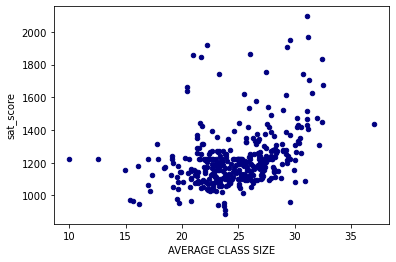

In [72]:
# Scatter Plot of sat_score and AVERAGE CLASS SIZE
combined.plot.scatter("AVERAGE CLASS SIZE", "sat_score", color='navy')

It appears that SAT scores > 1600 are associated with class sizes between 20 through 33.  Some may think that smaller class size is associated with higher SAT scores, though, this analysis does not necessarily indicate that.  

### Bar plot: correlations between SAT scores and survey topics of safety, communication, engagement, and expectations

The surveys are from parents, teachers, and students at each school on topics of school safety and respect, communication, engagement, and academic expectations.  The dictionary of the column name and its description is given as an image at the beginning of this project.  

In [73]:
# Remove DBN column from survey dataframe as it is not a useful numerical value for correlation.

# Before removing the DBN column, view the number of columns in survey dataframe.
len(survey_new_cols)

17

In [74]:
# Remove DBN column from the list of columns in the survey dataframe.
survey_new_cols.remove("DBN")  

# After removing the DBN column, view the number of columns in survey dataframe.
len(survey_new_cols)

16

<AxesSubplot:>

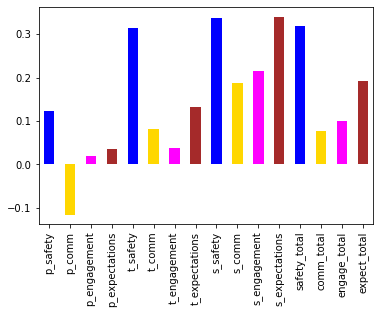

In [75]:
# Bar plot: SAT score vs Survey fields

color = ['blue', 'gold', 'fuchsia','brown',
        'blue', 'gold', 'fuchsia','brown',
        'blue', 'gold', 'fuchsia','brown',
        'blue', 'gold', 'fuchsia','brown']

combined.corr()["sat_score"][survey_new_cols].plot.bar(color=color)

The p, t, and s represent parent, teacher, and students' responses to the survey on topics of safety and respect, communication, engagement, and academic expectations.  

How students and teachers perceive safety, s_safety and t_safety, are positively correlated, ~0.25, with SAT scores, although, it they are not high r values.  The positive correlation makes sense as the students need to feel safe to perform well on the tests. Also, the academic expectations that students perceive are correlated with SAT scores.

## Scatter Plot: relationship between SAT scores and preception of safety

<AxesSubplot:xlabel='s_safety', ylabel='sat_score'>

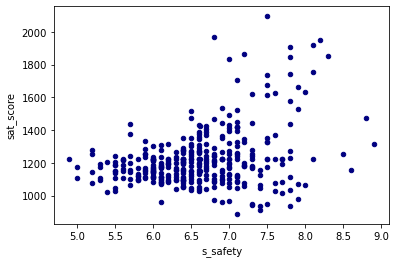

In [76]:
# Scatter Plot: Sat scores vs student's perception of safety
combined.plot.scatter("s_safety", "sat_score", color='navy')

There is somewhat of a relationship between SAT scores and the perception of safety. The schools with SAT scores > 1600 had a safety rating of about 7 or higher.

### Bar Plot: correlation between SAT scores and Race

<AxesSubplot:>

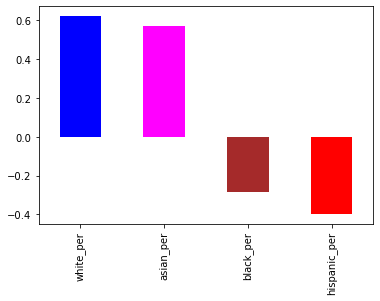

In [77]:
# Bar plot: SAT scores vs percent of White, Asian, Black, and Hispanic students.
race_cols = ['white_per','asian_per','black_per','hispanic_per']
combined.corr()['sat_score'][race_cols].plot.bar(color=['blue', 'fuchsia', 'brown', 'red'])

The bar plot shows a positive correlation between SAT scores and percent of White and Asian students.  It also shows a negative correlation between SAT scores and percent of Black and Hispanic students, which means that as the percent of black and hispanic students increase, then SAT scores decrease.  Hispanic students have the strongest negative correlation and will be explored further.

### Scatter Plot: SAT scores vs Hispanic students

<AxesSubplot:xlabel='hispanic_per', ylabel='sat_score'>

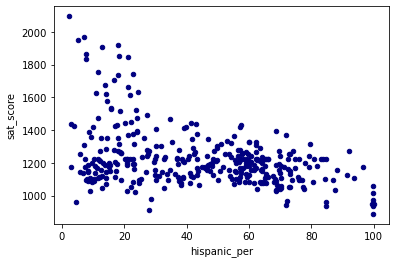

In [78]:
# Scatter plot: SAT scores and percent of Hispanic students.
combined.plot.scatter(x='hispanic_per', y='sat_score', color='navy')

SAT scores greater than 1600, are associated with Hispanic students < 30 percent.

### Explore schools that have > 95% of Hispanic students

In [79]:
# Filter schools that are > 95% hispanic students.
schools_hisp_95 = combined[ combined['hispanic_per'] > 95 ]
schools_hisp_95 = schools_hisp_95['SCHOOL NAME']
print(schools_hisp_95)

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools where there were > 95% Hispanic students are ones that are geared toward new immigrants. So the students are likely learning English, which may explain the low SAT scores.

### Explore schools that have < 10% Hispanic students <u>*and*</u> SAT scores > 1800

In [80]:
# Filter schools that are < 10% of hispanic students and SAT scores > 1800.
print(combined[(combined['hispanic_per']<10) &
               (combined['sat_score']>1800)]['SCHOOL NAME'])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


Schools, where there were < 10% Hispanic students and SAT scores > 1800, are specialized technical schools. The schools require students to pass an entrance exam.

### Bar Plot: correlations between SAT scores vs gender

<AxesSubplot:>

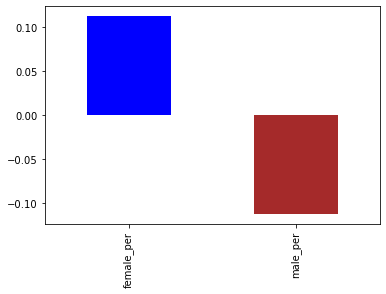

In [81]:
# Bar plot:  SAT scores vs percent gender.
gender_cols = ['female_per', 'male_per']
combined.corr()['sat_score'][gender_cols].plot.bar(color=['blue', 'brown'])

With a higher percent of female students, there is a positive correlation with SAT scores. Though, with higher percent of male students, there is a negative correlation with SAT scores; this means that the higher the percent of male students, the lower the SAT scores.  However, the r values are only about 0.10 and -0.10.

### Scatter Plot: relationship between SAT scores vs percent of female students

<AxesSubplot:xlabel='female_per', ylabel='sat_score'>

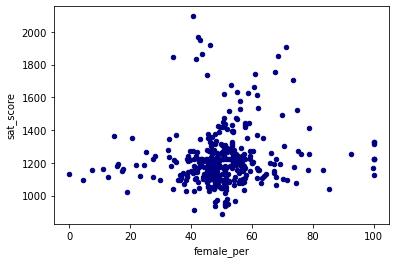

In [82]:
# Scatter plot of female_per vs sat_score
combined.plot.scatter(x='female_per' , y='sat_score', color='navy')

Higher SAT scores are associated with schools that have percent of females between 35% through 80%.

In [83]:
# Research schools with female_per > 60% & sat_score > 1700
print(combined[(combined['female_per']>60) & 
                (combined['sat_score']>1700)]['SCHOOL NAME'])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


Where there is 60% or more female students and where the SAT scores are greater than 1700, the schools are very selective liberal arts schools with high academic standards.

### Scatter Plot: relationship between SAT scores and percent of students who have taken an AP Exam
Advanced Placement (AP) exams in various topics are taken by high school students to earn college credit.  In a school, higher percent of students who have taken an AP exam may have higher SAT scores

In [84]:
# View schools with the greatest percent of students who have taken the AP exam.  
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

# Sort values in ap_per column.
ap_sort = combined.sort_values('ap_per', ascending=False)

# View schools who have the highest percent of students who have taken an AP exam.  
ap_sort.loc[:, ['SCHOOL NAME', 'ap_per']].head()

,SCHOOL NAME,ap_per
335,CAMBRIA HEIGHTS ACADEMY,0.730745
111,BRONX BRIDGES HIGH SCHOOL,0.693029
222,THE BROOKLYN ACADEMY OF GLOBAL FINANCE,0.675594
208,FRANCES PERKINS ACADEMY,0.620922
6,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,0.617354


<AxesSubplot:xlabel='ap_per', ylabel='sat_score'>

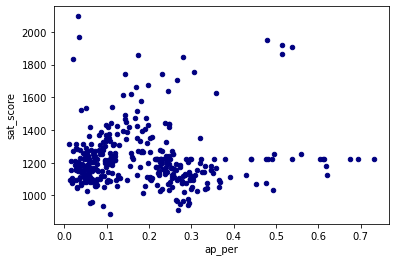

In [85]:
# Scatter plot: SAT scores vs percent of students who have taken AP exam.
combined.plot.scatter(x='ap_per', y='sat_score', color='navy')

Students who have SAT scores > 1600 are associated with schools that have < 60% of students who have taken an AP exam.  So, the schools where a greater percent of students who have taken an AP exam was not associated with higher SAT scores.  

## <font color='blue'> CONCLUSION </font>

This project investigated relationships and correlations between New York City schools' SAT scores and various demographics.  The data was explored, cleaned and the seven dataframes were combined into one for analysis.

Correlations were based on Pearson's correlation coefficient or an r value from -1 to 1.  

The following correlations and relationships were explored:
- Correlations between SAT scores and various demographics (numerical columns in the combined dataframe: 
    - Greatest postively correlated: percent of White students, number of Regents and advanced Regents diplomas, total graduates of the school, and number of Asian students
    - Greatest negatively correlated: percent of Black students, percent of Hispanic students, percent of english language learners, percent of special education students, drop out rate, and percent of students on free or reduced lunch program.
- Relationship between SAT scores and average class size: SAT scores > 1600 had average class size of 20-33.
- Correlations between SAT scores and survey topics: the most positively correlated survey topic was the perception of safety and respect.  SAT scores > 1600 had safety scores >= 7.  
- Correlations between SAT scores and race: the number of White and Asian students were positively correlated with SAT scores, while the number of Black and Hispanic students were negatively correlated with SAT scores.  
- Relationship between SAT scores and percent of Hispanic students:  schools where SAT scores > 1600 have < 30% Hispanic students.
- Correlations between SAT scores and gender: the number of female students are positively correlated to SAT scores, and the number of male students are negatively correlated to SAT scores.  
- Relationship between SAT scores and percent of students who have taken an AP exam:  interestingly, SAT scores > 1600 had < 60% students who had also taken an AP exam.  

There were some expected, and some unexpected results.  

For future iterations of this project, possible next steps are:  
- Map the neighborhoods that have schools with the best SAT scores.  
- Find property values to find least expensive neighborhoods with with good SAT scores.  
- Assign scores to schools based on SAT scores and other attributes.